In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

In [23]:
df = pd.read_excel("../data/raw/entrenamiento.xlsx")
df = df.rename(columns={"C7.1": "C8", "des": "QUALITY"})
features = df.drop(columns=["QUALITY"])
target = df["QUALITY"]

In [25]:
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8,5
1,6.2,0.246860,NaN,5.0,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8,6
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7,5
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4,5
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3913,7.7,NaN,0.215111,11.2,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3,7
3914,8.1,0.378436,0.270027,1.7,52.00,50.0,5.214936,0.99230,3.03,0.350657,11.2,5
3915,6.1,0.148420,0.254642,6.0,0.03,29.0,4.976734,0.99474,3.68,0.378436,10.7,6
3916,8.2,0.239017,0.329304,7.8,NaN,49.0,5.342334,0.99760,3.31,0.412110,9.5,6


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,3684.0,6.857166,0.846430,3.800000,6.300000,6.800000,7.300000,14.200000
C2,3664.0,0.421440,0.988207,0.076961,0.190620,0.231112,0.285179,6.913737
C3,3648.0,0.284054,0.086887,0.000000,0.239017,0.277632,0.329304,0.802002
C4,3636.0,6.424642,5.084063,0.600000,1.700000,5.300000,9.900000,65.800000
C5,3659.0,40.685294,25.106022,0.020000,33.000000,41.000000,49.000000,346.000000
C6,3655.0,35.216142,17.167346,2.000000,23.000000,34.000000,46.000000,289.000000
C7,3645.0,4.885591,0.341723,2.302585,4.691348,4.912655,5.129899,6.089045
C8,3646.0,65.824651,245.359289,0.987110,0.991800,0.994100,0.996825,1001.000000
C9,3658.0,3.188291,0.152155,2.720000,3.090000,3.180000,3.280000,3.820000
C10,3639.0,0.395421,0.074535,0.198851,0.343590,0.385262,0.438255,0.732368


## Boxplot - Visual Method

/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

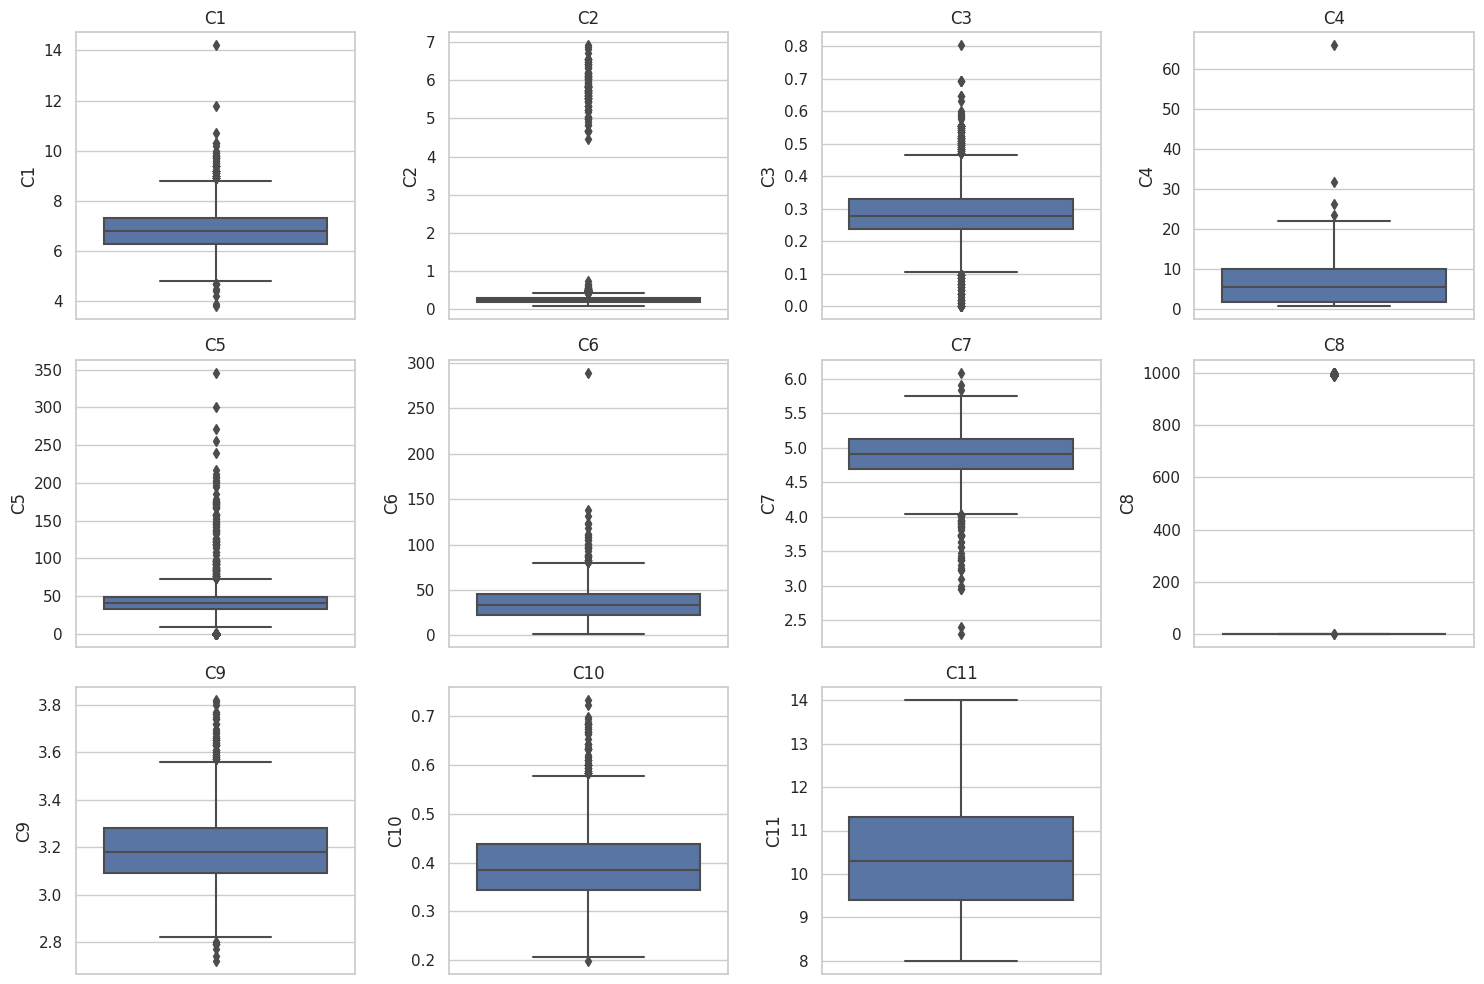

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

columns = df.columns[:-1]  
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

## IQR - Statistical Method

In [22]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Detectar outliers en todas las columnas
outliers_flags = pd.DataFrame()
for column in columns:
    outliers_flags[column] = detect_outliers_iqr(df, column)

# Sumar el número de outliers detectados por columna
outliers_count = outliers_flags.sum()
outliers_count

C1      83
C2     199
C3     186
C4       4
C5     539
C6      36
C7      54
C8     240
C9      58
C10     72
C11      0
dtype: int64

## Isolation Forest - Model Method

In [29]:
columns = df.columns[:-1] 

# Temporal Imputation
df_temp_imputed = df.copy()
for column in columns:
    df_temp_imputed[column].fillna(df_temp_imputed[column].median(), inplace=True)

# Apply Isolation Forest Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(df_temp_imputed[columns])
anomalies

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
# Convertir las etiquetas (-1 es outlier, 1 es inlier) a formato 0 y 1
df['anomalia'] = [1 if x == -1 else 0 for x in anomalies]

# Calcular la probabilidad de ser un outlier (score_samples devuelve valores negativos)
outlier_scores = -iso_forest.score_samples(df_temp_imputed[columns])
df['outlier_prob'] = outlier_scores

df[['anomalia', 'outlier_prob']].head()


,anomalia,outlier_prob
0,0,0.431584
1,0,0.393578
2,0,0.466656
3,0,0.396743
4,0,0.408214


In [28]:
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY,anomalia,outlier_prob
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8,5,0,0.431584
1,6.2,0.246860,NaN,5.0,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8,6,0,0.393578
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7,5,0,0.466656
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4,5,0,0.396743
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2,5,0,0.408214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,7.7,NaN,0.215111,11.2,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3,7,0,0.388577
3914,8.1,0.378436,0.270027,1.7,52.00,50.0,5.214936,0.99230,3.03,0.350657,11.2,5,0,0.412696
3915,6.1,0.148420,0.254642,6.0,0.03,29.0,4.976734,0.99474,3.68,0.378436,10.7,6,0,0.432756
3916,8.2,0.239017,0.329304,7.8,NaN,49.0,5.342334,0.99760,3.31,0.412110,9.5,6,0,0.406615


/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alberte/Desktop/Fruit/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


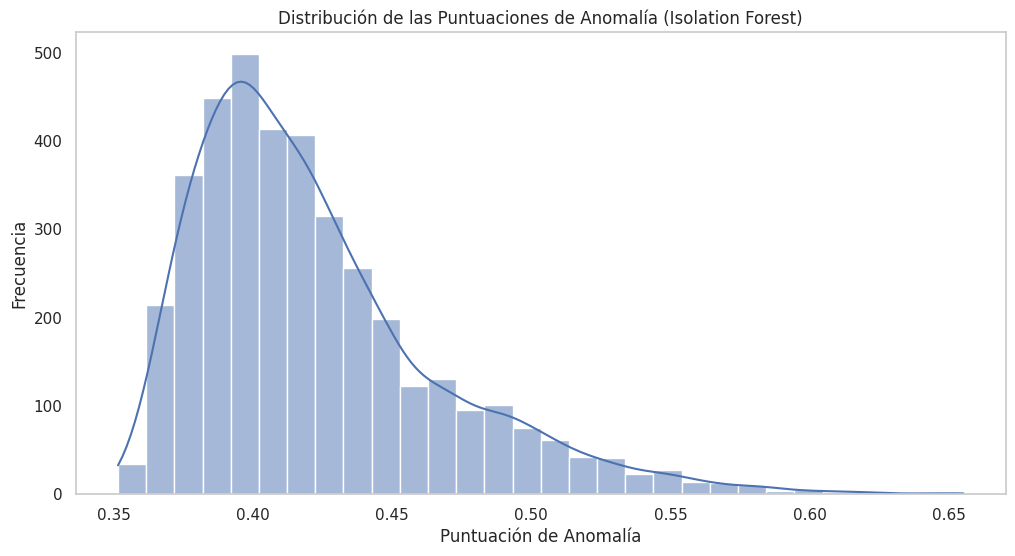

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['outlier_prob'], kde=True, bins=30)
plt.title('Distribución de las Puntuaciones de Anomalía (Isolation Forest)')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

### Imputation Method for Isolation Forest

#### Function to apply the Isolation Forest

In [35]:
def apply_isolation_forest(data, columns):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    anomalies = iso_forest.fit_predict(data[columns])
    outlier_scores = -iso_forest.score_samples(data[columns])
    return anomalies, outlier_scores

#### Imputation and outliers detection

In [36]:
# a) Imputación con Mediana
df_median_imputed = df.copy()

for column in columns:
    df_median_imputed[column].fillna(df_median_imputed[column].median(), inplace=True)
anomalies_median, scores_median = apply_isolation_forest(df_median_imputed, columns)

# b) Imputación con Media
df_mean_imputed = df.copy()

for column in columns:
    df_mean_imputed[column].fillna(df_mean_imputed[column].mean(), inplace=True)
anomalies_mean, scores_mean = apply_isolation_forest(df_mean_imputed, columns)

# c) Imputación KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = df.copy()
df_knn_imputed[columns] = knn_imputer.fit_transform(df_knn_imputed[columns])
anomalies_knn, scores_knn = apply_isolation_forest(df_knn_imputed, columns)

#### Results

In [37]:
results = {
    'Method': ['Median', 'Mean', 'KNN'],
    'Outliers Detected': [sum(anomalies_median == -1), sum(anomalies_mean == -1), sum(anomalies_knn == -1)]
}

results_df = pd.DataFrame(results)
results_df

,Method,Outliers Detected
0,Median,196
1,Mean,196
2,KNN,196


### LOF

In [40]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
anomalies_lof = lof.fit_predict(df_median_imputed[columns])

total_outliers_lof = sum(anomalies_lof == -1)
total_outliers_lof

196